# Credit Card Fraud Detection

## Introduction
Credit card fraud is a wide-ranging term for theft and fraud committed using or involving a payment card, such as a credit card or debit card, as a fraudulent source of funds in a transaction. The purpose may be to obtain goods or services, or to make payment to another account which is controlled by a criminal. The Payment Card Industry Data Security Standard (PCI DSS) is the data security standard created to help businesses process card payments securely and reduce card fraud. Fraud prevention measures include the use of a credit card's security code, the cardholder's signature, the cardholder's billing address, and the card's issuing bank. More recently, big data and machine learning have been used to detect fraud.

## Problem Statement
The problem is to detect fraudulent credit card transactions using machine learning models. The dataset that we will be using for this problem is the Credit Card Fraud Detection dataset from Kaggle. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Data
The dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we do not have the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Evaluation
The evaluation metric for this problem is the F1 score. The F1 score is the harmonic mean of precision and recall. It is a good way to show that a classifer has a good value for both recall and precision. The F1 score is the best metric to use if you want to seek a balance between Precision and Recall.

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

We're going to use scikit-learn for machine learning modelling and evaluation.

We're going to use seaborn for data visualization.

Let's import all the tools we need.

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Now we can import the dataset and start exploring it.

In [152]:
data = pd.read_csv('creditcard.csv')

In [153]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This dataset contains 31 columns and 284,807 rows. The columns are all numerical and the only columns that are not transformed with PCA are 'Time' and 'Amount'. The 'Class' column is the target column and it takes value 1 in case of fraud and 0 otherwise, as mentioned earlier.
Good to mention that 'Time' has no meaning in this dataset, it's just a temporal reference of when the given transaction was performed ,so we can drop it.

In [154]:
time = data['Time']
amount = data['Amount']
fraud = data['Class']

features = list(data.columns[1:])
print("Number of features: ", len(features))
print("Features: ", features)

data = data[features]
label_column = features.pop()

print("Number of features after removing label column: ", len(features))
print("Label column: ", label_column) # Value between 0 and 1 (0: non-fraud, 1: fraud)


Number of features:  30
Features:  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Number of features after removing label column:  29
Label column:  Class


# Exploratory Data Analysis (EDA)
Let's start by exploring the dataset and see what we can find.

## Data Preparation
Let's start by preparing the data for modelling. We will start by splitting the data into features and target.


In [155]:
X = data[features]
Y = data[label_column]

m = len(X)
n = len(X.columns)

print("Number of samples: ", m)
print("Number of features: ", n)

Number of samples:  284807
Number of features:  29


## Data Balancing

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. This is a problem because most machine learning models are designed to maximize overall accuracy, which especially for imbalanced datasets, this can be misleading. For example, if we have 100 transactions and 99 are not fraud and 1 is fraud, a model that simply predicts that all transactions are not fraud will achieve 99% accuracy, even though it has a 100% false negative rate. This is why we need to balance the data. To demonstrate this, let's plot the target column.

Number of fraud samples:  492
Number of non-fraud samples:  284315
Percentage of fraud samples:  0.173 %
Percentage of non-fraud samples:  99.827 %


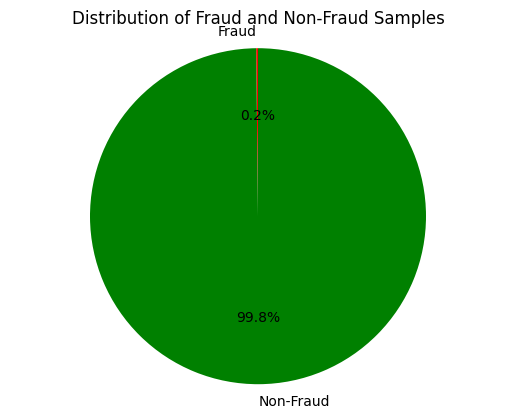

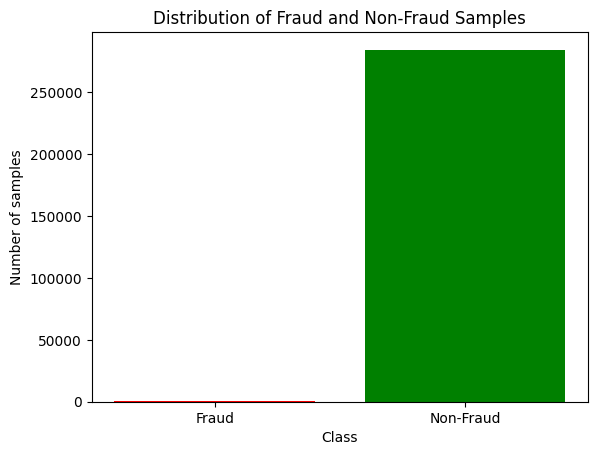

In [156]:
fraud_samples = len(Y[Y == 1])
non_fraud_samples = len(Y[Y == 0])

print("Number of fraud samples: ", fraud_samples)

print("Number of non-fraud samples: ", non_fraud_samples)

print("Percentage of fraud samples: ", round(fraud_samples / m * 100, 3), "%")

print("Percentage of non-fraud samples: ", round(non_fraud_samples / m * 100, 3), "%")

# Ploting the data to see the distribution of fraud and non-fraud samples
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_samples, non_fraud_samples]
colors = ['red','green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Fraud and Non-Fraud Samples')
plt.show()

# Now with a bar chart to have a better view of the distribution
plt.bar(labels, sizes, color=colors)
plt.title('Distribution of Fraud and Non-Fraud Samples')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

To balance the data, we can use the SMOTE technique. SMOTE (Synthetic Minority Over-sampling Technique) is a technique that generates synthetic samples from the minority class. It operates by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Let's balance the data using SMOTE.

Number of fraud samples:  492
Number of non-fraud samples:  492


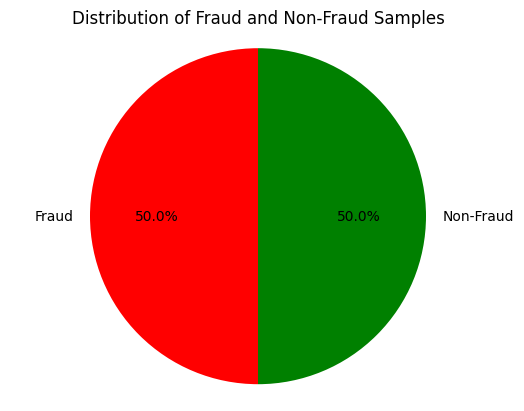

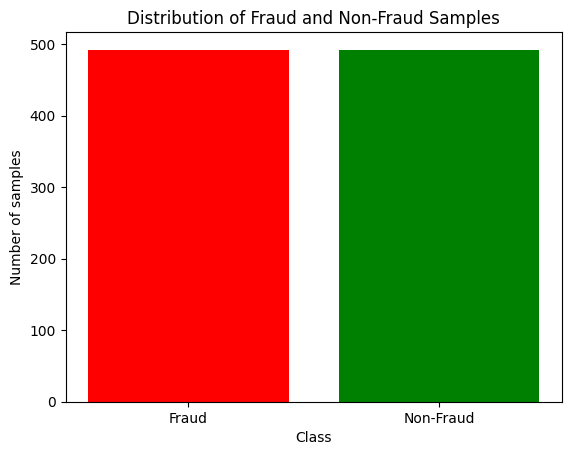

Number of samples:  984
Number of features:  29
Number of fraud samples:  492
Number of non-fraud samples:  492


In [157]:
# Balancing the dataset
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

normal = normal.sample(fraud_samples)

print("Number of fraud samples: ", len(fraud))
print("Number of non-fraud samples: ", len(normal))

balanced_data = pd.concat([fraud, normal])

# Ploting the data to see the distribution of fraud and non-fraud samples
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_samples, fraud_samples]
colors = ['red','green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Fraud and Non-Fraud Samples')
plt.show()

# Now with a bar chart to have a better view of the distribution
plt.bar(labels, sizes, color=colors)
plt.title('Distribution of Fraud and Non-Fraud Samples')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

data = balanced_data

X = balanced_data[features]

Y = balanced_data[label_column]

print("Number of samples: ", len(X))
print("Number of features: ", len(X.columns))
print("Number of fraud samples: ", len(Y[Y == 1]))
print("Number of non-fraud samples: ", len(Y[Y == 0]))

# Data Normalization

Normalization is the process of scaling individual samples to have a unit norm. This dataset needs to be normalized because the features have different units, and this can lead to bias in the model. We will use the StandardScaler to normalize the data.

In [158]:
# Using the StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=features)

data = pd.concat([data[features], data[label_column]], axis=1)


# Feature Analysis

Let's start by analyzing the features and see if we can find any patterns.

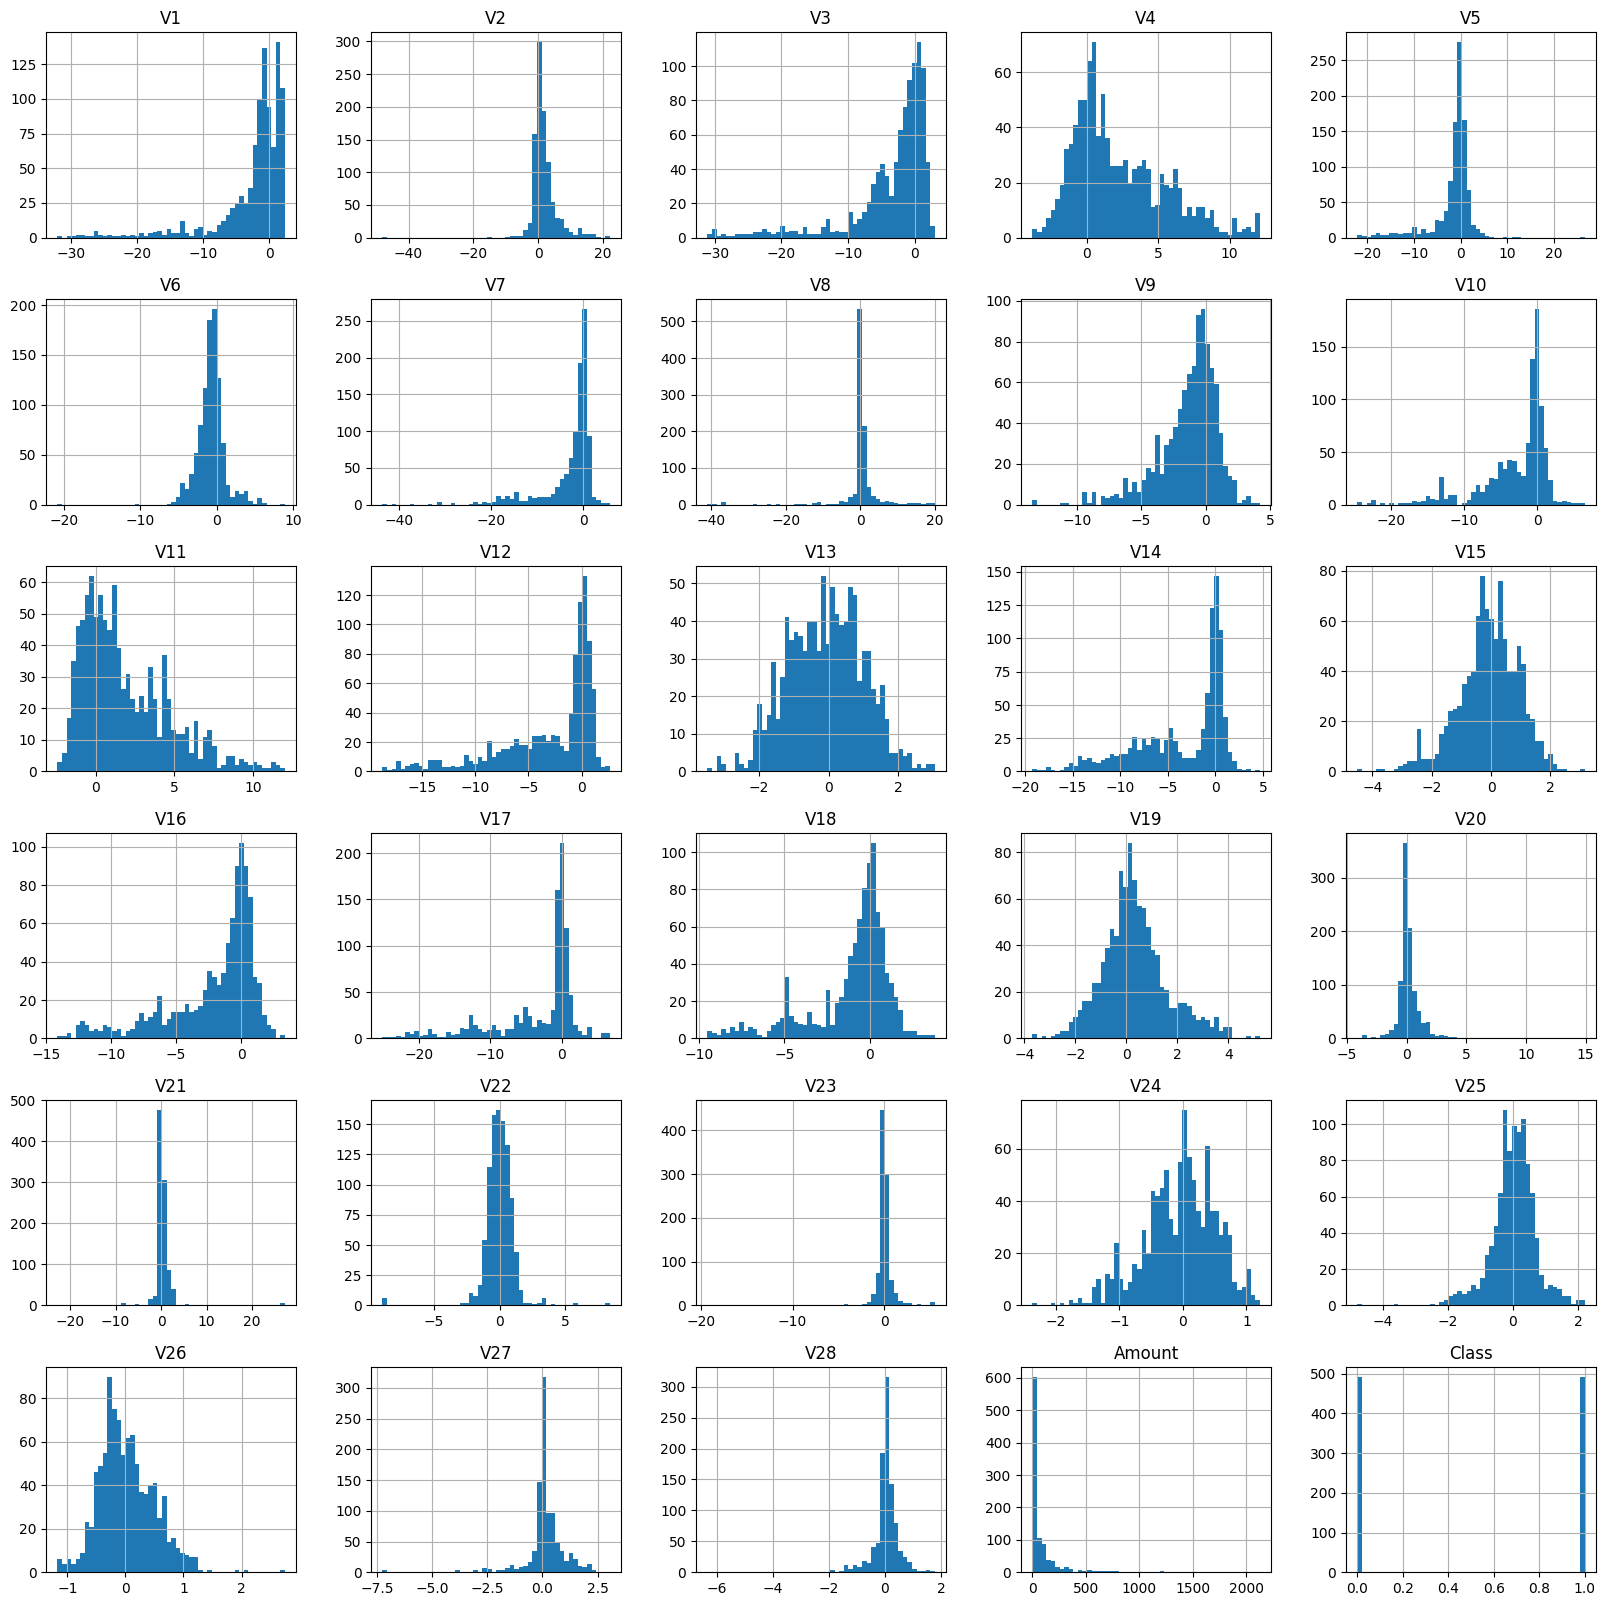

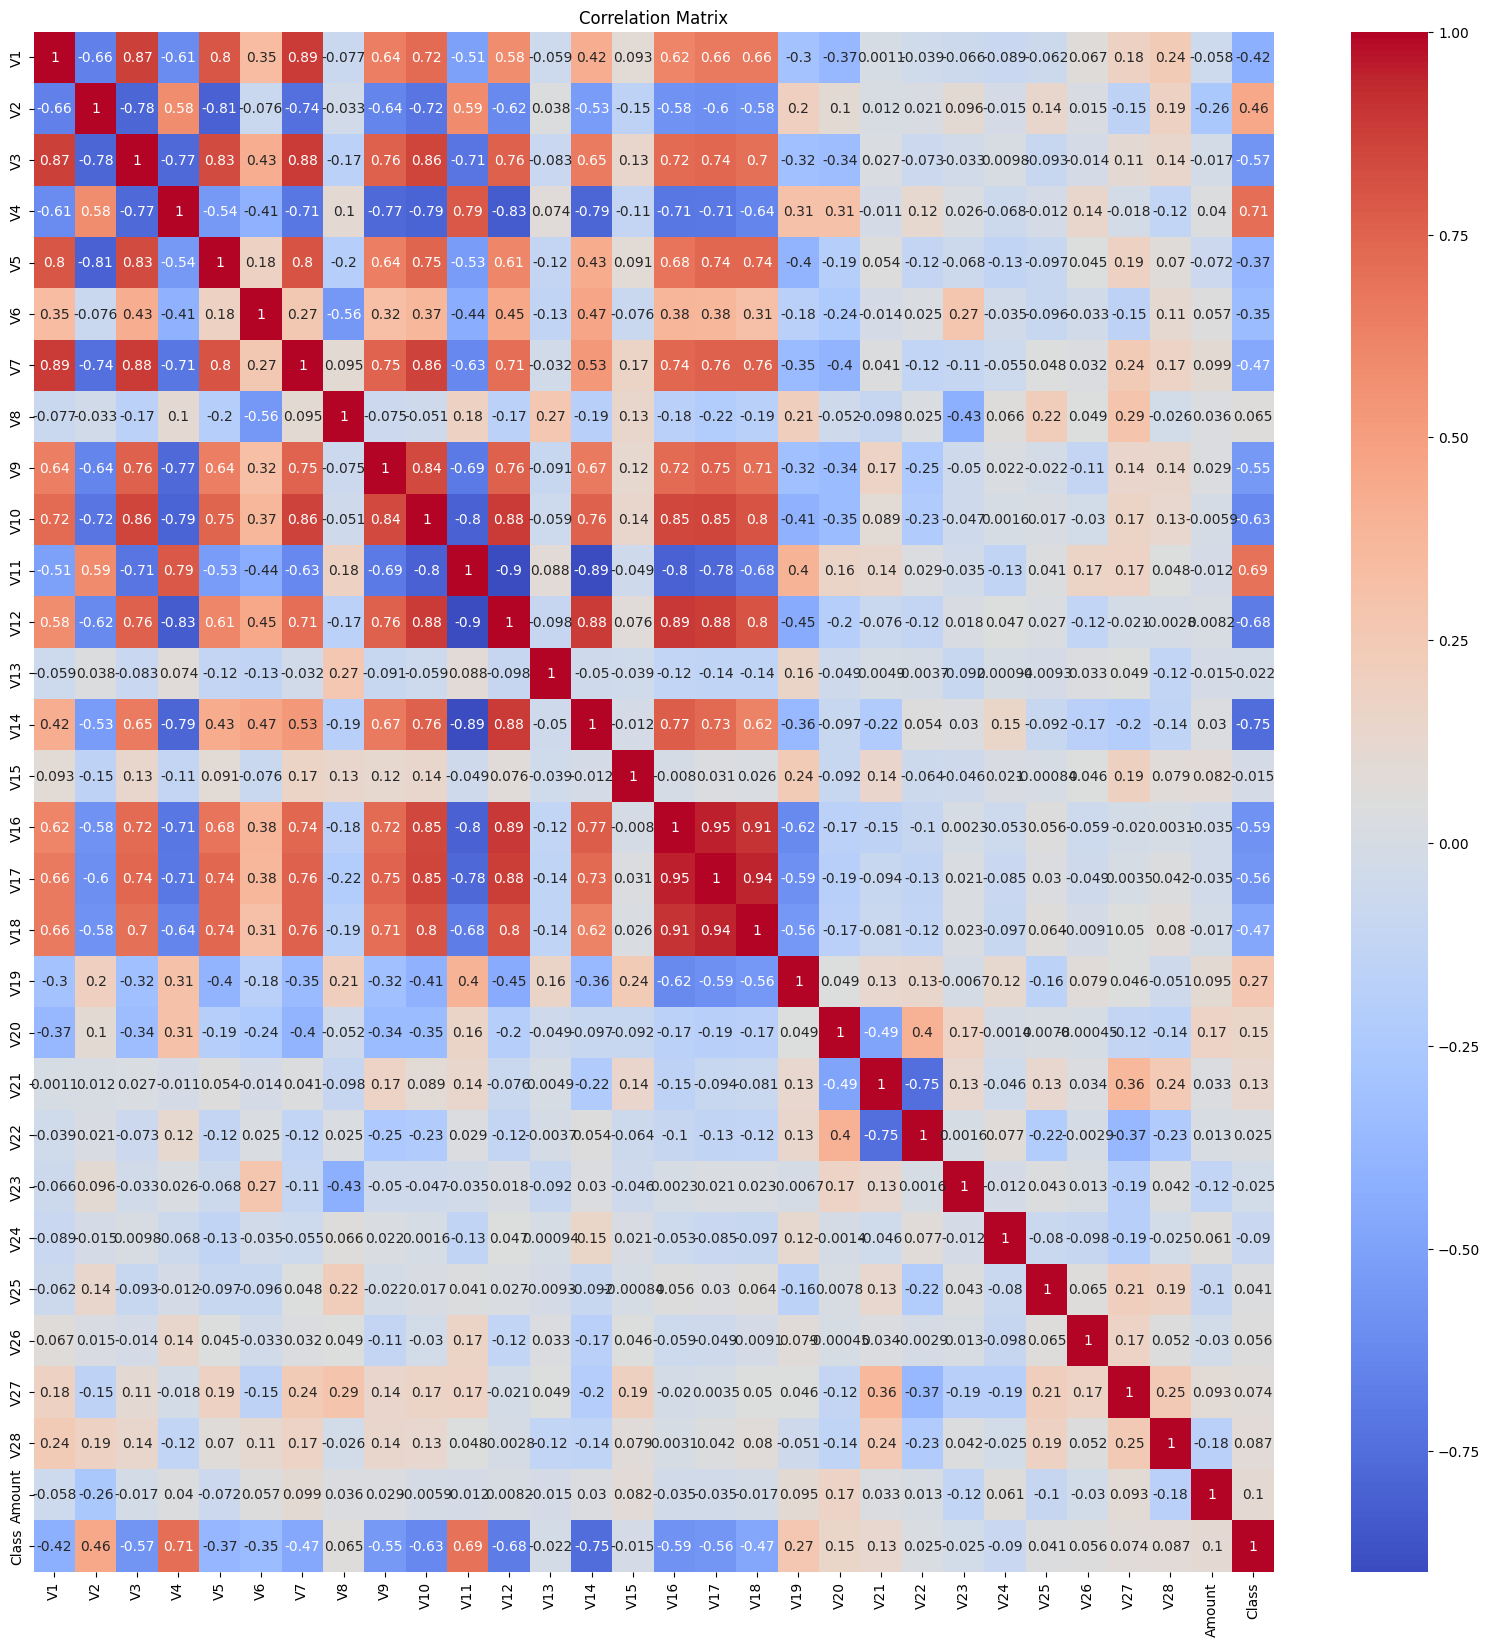

Best features: V3, V4, V9, V10, V11, V12, V14, V16, V17


In [159]:
# Feature Analysis

# Histograms
data.hist(figsize=(20, 20), bins=50)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Selecting the features with the highest correlation with the label column
significance_treshold = .5
best_features = correlation_matrix['Class'][correlation_matrix['Class'].abs() > significance_treshold].keys().values[:-1]

print("Best features:", ', '.join(best_features))



